#Preparing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from IPython.display import Image
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

random.seed(108)

In [ ]:
# Create Nine-dash_Line folder
!mkdir Nine-dash_Line


In [ ]:
cd /content/drive/MyDrive/Dataset/zai2019_hackaton_train/annotations

/content/drive/MyDrive/Dataset/zai2019_hackaton_train/annotations


In [ ]:
def convert_bbox_coco2yolo(img_width, img_height, bbox):
    x_tl, y_tl, w, h = bbox

    dw = 1.0 / img_width
    dh = 1.0 / img_height

    x_center = x_tl + w / 2.0
    y_center = y_tl + h / 2.0

    x = x_center * dw
    y = y_center * dh
    w = w * dw
    h = h * dh

    return [x, y, w, h]

In [ ]:
import os
import json
from tqdm import tqdm
import shutil

def make_folders(path="output"):
    if os.path.exists(path):
        shutil.rmtree(path)
    os.makedirs(path)
    return path


def convert_coco_json_to_yolo_txt(output_path, json_file):

    path = make_folders(output_path)

    with open(json_file) as f:
        json_data = json.load(f)

    # write _darknet.labels, which holds names of all classes (one class per line)
    label_file = os.path.join(output_path, "_darknet.labels")
    with open(label_file, "w") as f:
        for category in tqdm(json_data["categories"], desc="Categories"):
            category_name = category["name"]
            f.write(f"{category_name}\n")

    for image in tqdm(json_data["images"], desc="Annotation txt for each iamge"):
        img_id = image["id"]
        img_name = image["file_name"]
        img_width = image["width"]
        img_height = image["height"]

        anno_in_image = [anno for anno in json_data["annotations"] if anno["image_id"] == img_id]
        anno_txt = os.path.join(output_path, img_name.split(".")[0] + ".txt")
        with open(anno_txt, "w") as f:
            for anno in anno_in_image:
                category = anno["category_id"]
                bbox_COCO = anno["bbox"]
                x, y, w, h = convert_bbox_coco2yolo(img_width, img_height, bbox_COCO)
                f.write(f"{category} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")

    print("Converting COCO Json to YOLO txt finished!")

In [ ]:
convert_coco_json_to_yolo_txt("/content/Nine-dash_Line/labels", "ninedash_keypoints_train.json")

Annotation txt for each iamge: 100%|██████████| 2590/2590 [00:00<00:00, 9800.59it/s]

Converting COCO Json to YOLO txt finished!


In [ ]:
!rsync -r --progress "/content/labels" "/content/drive/MyDrive/Dataset/zai2019_hackaton_train"

In [ ]:
cd ../../../../..

/content


In [ ]:
cd Nine-dash_Line/

/content/Nine-dash_Line


In [ ]:
!mkdir Images

!mkdir Annotations

In [ ]:
import glob
def move(src, dst):
  for filename in glob.glob(os.path.join(src, '*.*')):
    shutil.copy(filename, dst)

move('/content/drive/MyDrive/Dataset/zai2019_hackaton_train/images/train','/content/Nine-dash_Line/Images')
move('/content/drive/MyDrive/Dataset/zai2019_hackaton_train/labels', '/content/Nine-dash_Line/Annotations')

In [ ]:
images = [x for x in os.listdir('Images')]
annotations = [x for x in os.listdir('Annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()
annotations.remove('619.txt')
# annotations.remove('labels/_darknet.labels')

# images.remove('396.jpg')

percentile_list = pd.DataFrame(
    {'images': images,
     'annotations': annotations,
    })
percentile_list

In [ ]:
print(len(images))
print(len(annotations))

2589
2589


In [ ]:
annotations_ = [x for x in os.listdir('labels') if x[-3:] == "txt"]

In [ ]:
s = set(annotations_)
if '_darknet.labels' in s:
  print(True)
else:
  print(False)

False


In [ ]:
import re

def split_filename(path, num):
  img = []
  held_str = []
  for x in os.listdir(path):
    img.append(x)

  delimiters = "."
  regex_pattern = '|'.join(map(re.escape, delimiters))
  for im in img:
    held_str.append(re.split(regex_pattern, im))

  return [held_str[i][0] for i in range(0,num)]

In [ ]:
import collections
def compareList(l1,l2):
   if(collections.Counter(l1)==collections.Counter(l2)):
      return "Equal"
   else:
      return "Non equal"

In [ ]:
array_annotation = split_filename('labels', 2590)
array_annotation.sort()
array_annotation.remove('619')
array_annotation.remove('_darknet')

array_image = split_filename('Images', 2589)
array_image.sort()
array_image.remove('396')

annotations_ = [x for x in os.listdir('labels') if x[-3:] == "txt"]
annotations_.sort()

print(array_annotation)
print(array_image)
print(len(array_annotation))
print(len(array_image))

# for (i, j) in zip(array_image, array_annotation):
#   if i != j:
#     print(j)

In [ ]:
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [ ]:
print(len(train_images))
print(len(test_images))
print(len(val_images))
print(len(train_annotations))
print(len(test_annotations))
print(len(val_annotations))

2071
259
259
2071
259
259


In [ ]:
print(train_images[1000])
print(train_annotations[1000])

127.jpg
127.txt


In [ ]:
!pwd

/content/Nine-dash_Line


In [ ]:
!mkdir Images/train Images/val Images/test Annotations/train Annotations/val Annotations/test

In [ ]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

In [ ]:
cd Images/

/content/Nine-dash_Line/Images


In [ ]:
move_files_to_folder(train_images, 'train/')
move_files_to_folder(val_images, 'val/')
move_files_to_folder(test_images, 'test/')

In [ ]:
cd ../Annotations

/content/Nine-dash_Line/Annotations


In [ ]:
move_files_to_folder(train_annotations, 'train/')
move_files_to_folder(val_annotations, 'val/')
move_files_to_folder(test_annotations, 'test/')

(1513, 1990, 3)


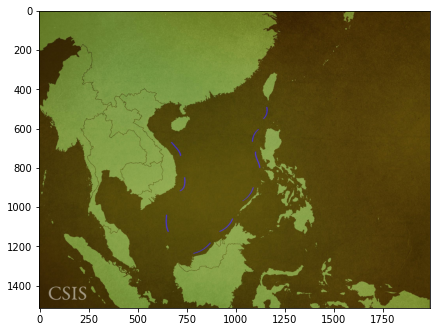

In [ ]:
import cv2
img = cv2.imread('009.jpg')

# Height, width, channel
print(img.shape)

plt.imshow(img)

In [ ]:
cd ..

/content/Nine-dash_Line


In [ ]:
!mv Images images
!mv Annotations labels

In [ ]:
cd ..


/content


# Training

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15338, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 15338 (delta 0), reused 2 (delta 0), pack-reused 15335
Receiving objects: 100% (15338/15338), 14.15 MiB | 31.57 MiB/s, done.
Resolving deltas: 100% (10524/10524), done.


In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
cd yolov5

In [ ]:
!rm nine_dash_line.yaml
!echo 'train: /content/Nine-dash_Line/images/train' >> nine_dash_line.yaml
!echo 'val: /content/Nine-dash_Line/images/val' >> nine_dash_line.yaml
!echo 'test: /content/Nine-dash_Line/images/test' >>nine_dash_line.yaml
!echo 'nc: 2' >> nine_dash_line.yaml
!echo 'name: ["noninedash","ninedash"]' >> nine_dash_line.yaml

In [ ]:
!python train.py --img 420 --cfg yolov5s.yaml --hyp hyp.scratch-high.yaml --batch 32 --epochs 100 --data nine_dash_line.yaml --weights yolov5s.pt --workers 24 --name yolo_ninedash_det

In [ ]:
!rsync -r --progress "/content/yolov5/runs/train/yolo_ninedash_det" "/content/drive/MyDrive/Dataset/zai2019_hackaton_train"